In [2]:
import pandas as pd
import numpy as np

Data preparation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
!wget $data

--2023-09-20 16:56:18--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  6.04MB/s    in 0.2s    

2023-09-20 16:56:19 (6.04 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [5]:
df = pd.read_csv(data)

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [9]:
df.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [13]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [33]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [26]:
df.loc[:,df.dtypes[df.dtypes == 'object'].index]

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


In [27]:
df.index[np.where(df.dtypes=='object')]

Index([0, 1, 3, 6, 7, 9, 10, 11], dtype='int64')

In [34]:
df.iloc[:,df.index[np.where(df.dtypes=='object')]]

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


In [35]:
list(df.index[np.where(df.dtypes=='object')])

[0, 1, 3, 6, 7, 9, 10, 11]

In [43]:
strings = list(df.dtypes[df.dtypes== 'object'].index)

In [44]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [45]:
df.loc[:,strings]

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


Convert all string column values to lowercase

In [48]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ',"_")

In [49]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Explarotary Data Analysis

In [52]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print('/n')

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object
/n
model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object
/n
year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64
/n
engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object
/n
engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64
/n
engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64
/n
transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object
/n
driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object
/n
number_of_doo

In [53]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [54]:
import matplotlib as plt
import seaborn as sns

%matplotlib inline

/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

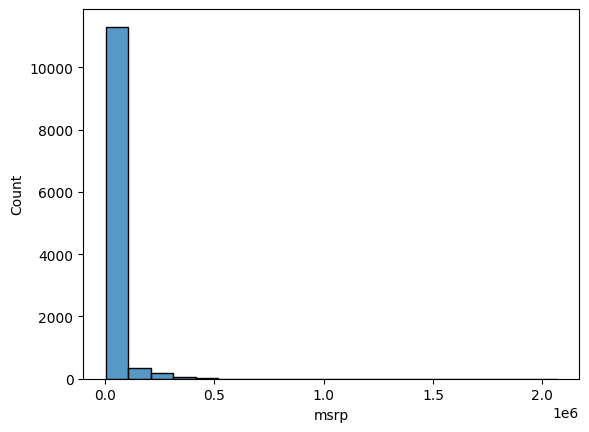

In [57]:
sns.histplot(df.msrp, bins = 20)

In [58]:
price_logs = np.log1p(df.msrp)

/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

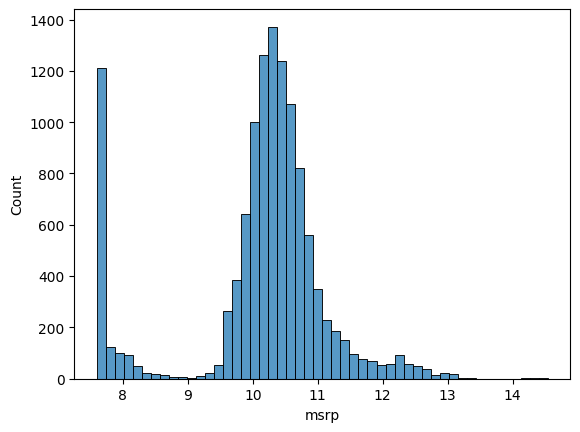

In [59]:
sns.histplot(price_logs, bins = 50)

In [61]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Setting up validation framework

train - 60%
validity - 20%
test - 20%

In [304]:
df.shape

(11914, 16)

In [77]:
n = len(df)

n_val = int(len(df) * 0.2)

n_test = int(len(df) * 0.2)

n_train = n - n_val - n_test

n_val, n_test, n_train

(2382, 2382, 7150)

In [82]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train+n_val]
df_test = df.iloc[n_train+n_val:]


In [83]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(7150, 16)
(2382, 16)
(2382, 16)


In [108]:
indx = np.arange(n)

In [109]:
indx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [110]:
np.random.seed(2)
np.random.shuffle(indx)

In [116]:
indx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [305]:
df_train = df.iloc[indx[:n_train]]
df_val = df.iloc[indx[n_train: n_train+n_val]]
df_test = df.iloc[indx[n_train+n_val:]]

In [123]:
indx[:n_train]

array([2735, 6720, 5878, ..., 9334, 5284, 2420])

In [125]:
df_train.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [306]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [128]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [130]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [134]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657


# Linear Regression

In [136]:
xi = [453, 11, 86]

In [140]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [141]:
def linear_regression(xi):

    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [142]:
linear_regression(xi)

12.312

In [147]:
# To change log to exp
# We do -1 to undo the +1 we did in log
np.exp(12.312) - 1

222347.2221101062

In [148]:
# a readily available function to do the above is 
np.expm1(12.312)

222347.2221101062

# Linear Regression Vector Form


In [149]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res
    

In [150]:
def linear_regression(xi):
   
    return w0 + dot(xi, w)

In [151]:
wnew = [w0] + w

In [152]:
wnew

[7.17, 0.01, 0.04, 0.002]

In [155]:
xi

[453, 11, 86]

In [158]:
def linear_regression(xi):
    xi = [1] + xi
   
    return dot(xi, wnew)

In [159]:
linear_regression(xi)

12.312

In [167]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
wnew = [w0] + w

In [168]:
x1 = [1, 148, 24,1385]
x2 = [1, 132, 25,2031]
x10 = [1, 453, 11,86]

X = [x1,x2,x10]
X = np.array(X)
X

In [169]:
X = [x1,x2,x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [172]:
def linear_regression(X):
    return X.dot(wnew)

In [173]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a linear regression model

In [254]:
X = [[148, 24,1385],
     [132, 25,2031],
     [453, 11,86],
     [158, 24,1385],
     [172, 25,2031],
     [38, 11,86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   25, 2031],
       [  38,   11,   86]])

In [252]:
ones = np.ones(X.shape[0])

In [253]:
X = np.column_stack([ones, X])

In [244]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 3.800e+01, 1.100e+01, 8.600e+01]])

In [245]:
y = [100,200,500,300, 200, 300]

In [246]:
XTX = X.T.dot(X)

In [247]:
XTX

array([[6.0000000e+00, 1.1010000e+03, 1.2000000e+02, 7.0040000e+03],
       [1.1010000e+03, 3.0052900e+05, 2.0345000e+04, 1.0834600e+06],
       [1.2000000e+02, 2.0345000e+04, 2.6440000e+03, 1.6992200e+05],
       [7.0040000e+03, 1.0834600e+06, 1.6992200e+05, 1.2101164e+07]])

In [248]:
XTX_inv = np.linalg.inv(XTX)

In [238]:
w = XTX_inv.dot(X.T).dot(y)

In [208]:
w

array([ 4.33997992e+02,  4.88716401e-01, -1.41754605e+01,  2.26999642e-02])

In [209]:
w0 = w[0]

In [210]:
w0

433.997992173876

In [211]:
w1= w[1:]

In [212]:
w1

array([  0.4887164 , -14.1754605 ,   0.02269996])

In [255]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:] 
    
    

In [256]:
X = [[148, 24,1385],
     [132, 25,2031],
     [453, 11,86],
     [158, 24,1385],
     [172, 25,2031],
     [38, 11,86],
]

X = np.array(X)

y = [100,200,500,300, 200, 300]

In [257]:
train_linear_regression(X,y)

(433.997992173876, array([  0.4887164 , -14.1754605 ,   0.02269996]))

# Baseline Model

In [261]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [339]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity' ]

In [266]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [271]:
X_train = df_train[base].values

In [272]:
X_train = df_train[base].fillna(0).values

In [273]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [274]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [276]:
w0, w =train_linear_regression(X_train, y_train)

In [277]:
w0

7.927257388069986

In [278]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [282]:
#Pred
y_pred = w0 + X_train.dot(w)

/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/deb/ml-zoomcamp/ml-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

<Axes: ylabel='Count'>

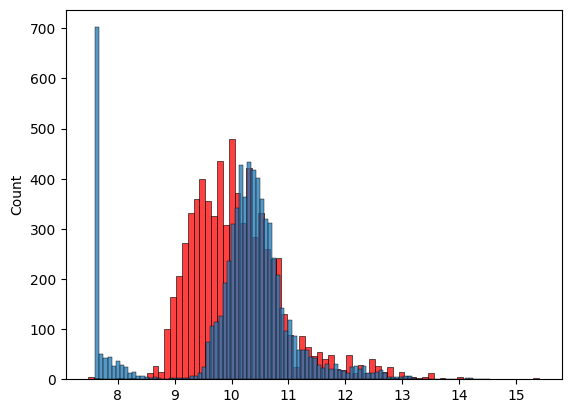

In [283]:
sns.histplot(y_pred, color = 'red')
sns.histplot(y_train)

# RMSE

In [284]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [285]:
rmse(y_pred, y_train)

0.7554192603920132

# Validating the model

In [ ]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity' ]

X_val = df_train[base].fillna(0).values

w, w = train_linear_regression

In [286]:
def prepare_X(df):

    df_num = df[base].fillna(0).values

    return df_num

In [290]:
X_val = prepare_X(df_val)

In [291]:
w0, w = train_linear_regression(X_val, y_val)

In [292]:
y_pred = w0 + X_val.dot(w)

In [293]:
rmse(y_val, y_pred)

0.751003347391545

# Feature engineering

In [294]:
df_train.year

0       2008
1       2012
2       2016
3       1991
4       2017
        ... 
7145    2015
7146    2015
7147    2015
7148    2014
7149    2017
Name: year, Length: 7150, dtype: int64

# Categorical Variables

In [296]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [297]:
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [299]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [298]:
df_train["num_doors_4"] = (df_train.number_of_doors == 4).astype(int)

In [300]:
df_train["num_doors_3"] = (df_train.number_of_doors == 3).astype(int)

In [301]:
df_train["num_doors_2"] = (df_train.number_of_doors == 2).astype(int)

In [308]:
# Loop way
for i in [2, 3, 4]:
    df_train['num_doors_%s' % i] = (df_train.number_of_doors == i).astype(int)

In [309]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,0,0,1


In [349]:
base =['engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [356]:
def prepare_X(df):
    df_new = df.copy()
    features = base.copy()
    

    df_new['age'] = 2017 - df.year
    features.append('age')
    # print(df_new.head())
    # print(f' Features : {features}')
    
    for i in [2, 3, 4]:
        
        df_new['num_doors_%s' % i] = (df_new.number_of_doors == i).astype(int)
        
        features.append('num_doors_%s' % i)

    df_num = df_new[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X




In [357]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [359]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.515799564150169

In [363]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [368]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [378]:
def prepare_X(df):
    df_new = df.copy()
    features = base.copy()
    

    df_new['age'] = 2017 - df.year
    features.append('age')
    # print(df_new.head())
    # print(f' Features : {features}')
    
    for i in [2, 3, 4]:
        
        df_new['num_doors_%s' % i] = (df_new.number_of_doors == i).astype(int)
        
        features.append('num_doors_%s' % i)

    for v in makes:
        
        df_new['make_%s' % v] = (df_new.make == v).astype(int)
        
        features.append('make_%s' % v)

    df_num = df_new[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X




In [379]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5076038849556795

In [384]:
list(df_train.dtypes[df_train.dtypes == 'object'].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [389]:
categories_object = [
 'make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style'
 ]

In [390]:
categories = {}

for c in categories_object:
    categories[c] = list(df[c].value_counts().head().index)

In [391]:
print(categories)

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], 'engine_fuel_type': ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel'], 'transmission_type': ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown'], 'driven_wheels': ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive'], 'market_category': ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback'], 'vehicle_size': ['compact', 'midsize', 'large'], 'vehicle_style': ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']}


In [392]:
def prepare_X(df):
    df_new = df.copy()
    features = base.copy()
    

    df_new['age'] = 2017 - df.year
    features.append('age')
    # print(df_new.head())
    # print(f' Features : {features}')
    
    for i in [2, 3, 4]:
        
        df_new['num_doors_%s' % i] = (df_new.number_of_doors == i).astype(int)
        
        features.append('num_doors_%s' % i)

    for c, values in categories.items():
        for v in values:
            df_new['%s_%s' % (c,v)] = (df_new[c] == v).astype(int)
        
            features.append('%s_%s' % (c,v))

    df_num = df_new[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X




In [393]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

30.23507117183833

In [395]:
w0, w

(6775859061080289.0,
 array([ 1.60153321e-01,  5.97007995e+00,  3.44242739e+00,  2.03169094e+00,
        -4.29920455e-04,  2.03440439e+00,  1.72759508e+03,  1.76077623e+03,
         1.74391163e+03,  5.41427513e-01,  4.07734659e+00, -5.27809286e-01,
        -6.41118293e+00, -5.33685888e+00,  1.77781114e+02,  1.48717357e+02,
         1.68263773e+02,  1.58118827e+02,  2.07147773e+02, -1.49832648e+16,
        -1.49832648e+16, -1.49832648e+16, -1.49832648e+16, -1.49832648e+16,
         8.20740574e+15,  8.20740574e+15,  8.20740574e+15,  8.20740574e+15,
        -4.36450031e+00, -6.20983238e+00, -6.30240281e+00, -1.47645611e+01,
         2.16584859e+00,  7.69712542e+01,  7.21113575e+01,  7.33879113e+01,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

# Regularization

In [396]:
XTX = [
    [1,2,2],
    [2,1,1.000001],
    [2,1.0000001, 1]
]

In [397]:
XTX = np.array(XTX)

In [398]:
XTX

array([[1.       , 2.       , 2.       ],
       [2.       , 1.       , 1.000001 ],
       [2.       , 1.0000001, 1.       ]])

In [399]:
np.linalg.inv(XTX)

array([[-3.33333374e-01,  6.06060624e-02,  6.06060624e-01],
       [ 6.06060624e-01, -9.09090937e+05,  9.09090634e+05],
       [ 6.06060625e-02,  9.09090906e+05, -9.09090937e+05]])

In [401]:
# As we can see there are huge numbers this leads to model not performing well. 
#To correct this we can add a small number to the diagonal elements

In [403]:
XTX = XTX + 0.01 * np.eye(3)

In [404]:
XTX

array([[1.01     , 2.       , 2.       ],
       [2.       , 1.01     , 1.000001 ],
       [2.       , 1.0000001, 1.01     ]])

In [405]:
np.linalg.inv(XTX)

array([[ -0.33668918,   0.33502909,   0.33499894],
       [  0.33499894,  49.91815911, -50.08733358],
       [  0.33502909, -50.0873488 ,  49.91815911]])

In [406]:
def train_linear_regression_regularised(X, y, r = 0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  # regularization

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [407]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_regularised(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4565219901456571

# Tuning the model

In [411]:
for r in [0.0, 0.000001, 0.00001, 0.0001, .1, 1, 10]:

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regularised(X_train, y_train, r=r)

    X_val = prepare_X(df_val)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(f'r value: {r}, weight: {w0}, score: {score}')



r value: 0.0, weight: 6775859061080289.0, score: 30.23507117183833
r value: 1e-06, weight: 401.8720810187712, score: 0.45651728133433594
r value: 1e-05, weight: 6.590905413435901, score: 0.4565170284506526
r value: 0.0001, weight: 6.29829381216216, score: 0.45651706115512675
r value: 0.1, weight: 6.191208692817916, score: 0.456569276302566
r value: 1, weight: 5.634896667769639, score: 0.4572204317998235
r value: 10, weight: 4.283980108950864, score: 0.4701456932100146


In [412]:

r = 0.00001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_regularised(X_train, y_train, r=r)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

score

0.4565170284506526

# Using the model

In [415]:
df_full_train = pd.concat([df_train, df_val])

In [416]:
df_full_train = df_full_train.reset_index(drop= True)

In [417]:
X_full_train = prepare_X(df_full_train)

In [418]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [422]:
y_full_train = np.concatenate([y_train, y_val])

In [424]:
w0, w = train_linear_regression_regularised(X_full_train, y_full_train, r=0.0001)

In [425]:
X_test = prepare_X(df_test)

y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

score

0.45177455005719364

In [428]:
car = df_test.iloc[20].to_dict()

car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'msrp': 35000}

In [429]:
df_sample = pd.DataFrame([car])

In [430]:
df_sample

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031,35000


In [431]:
X_sample = prepare_X(df_sample)

In [432]:
y_pred = w0 + X_sample.dot(w)

In [434]:
y_pred[0]

10.462659340490708

In [436]:
np.expm1(y_pred[0])

34983.46345003968

In [437]:
y_test[20]

10.463131911491967